> **Tip**: Welcome to the Investigate a Dataset project!

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

------------

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**:This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
- Year over year performance
1.	Revenue by year
2.  Average Voting By Year
---------
- Genres Performance
1.	Most common genres
2.	Revenue by genres
3.	Most popular genres 
---------
- Movies 
1.	Highest grossing movies 
2.	Top 20 runed movies
3.	Top 20 popular movies
4.	Top 20 voted movies 
---------
- Relation Between Voting And Popularity
 1. are the voted movies is most popular ?
---------
- what the Data Distrbution of vote average column

<a id='wrangling'></a>
## Data Wrangling
------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as ln
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [2]:
movies=pd.read_csv(r'D:\My Projects\tmdb-movies.csv')

In [3]:
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
- removing the columns cast, homepage, tagline, keywords, overview , imdb id and production_companies to improve dataset redability.
- I decided to remove the values after the first '|' sign to get better grouping and cleaner visualization in the analysis.
- droping the Null value raws

In [6]:
# drop unused columns from datafram
movies=movies.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id','production_companies'], axis=1)

In [7]:
# spliting genres column to inhance analysis view
split_grnres=movies['genres'].str.split("|",n=1,expand=True)
movies['genres']=split_grnres[0]

In [8]:
# drop n/a rows from datafram
movies=movies.dropna()

---------

<a id='eda'></a>
## Exploratory Data Analysis

### splitting : function take 3 arguments (data fram,column name and separator) and return splited column 
**hint:** put column name and seperator in duble quotes

In [9]:
# Most_Common : function take 2 argument and return series with most common in mentioned column 
def Most_Common (df,column_name):
    return df[column_name].value_counts()

---

In [10]:
# top_of_group : function take 3 argument and return top 10 of mentioned columns 
def top_of_group (df,column_to_group,value_column) :
    return df.groupby([column_to_group])[value_column].sum().sort_values(ascending=False)[:10]

-----

### Research Question 1 (Revenue by year)

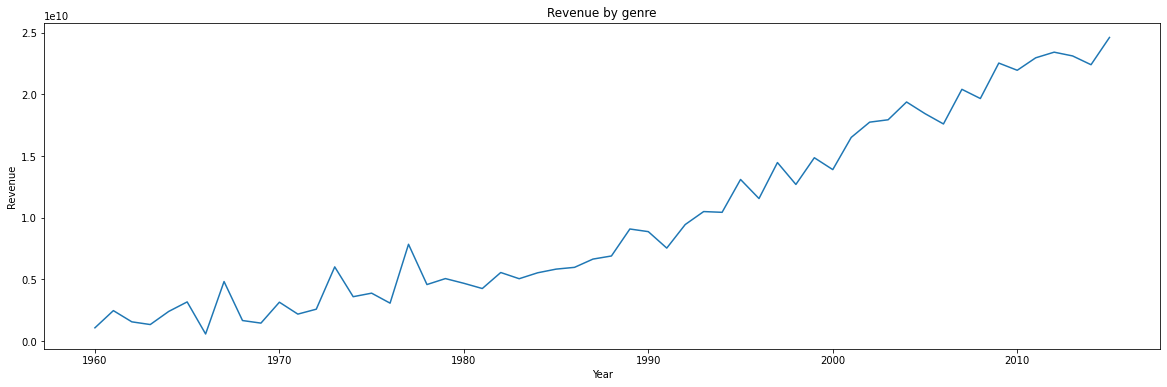

In [11]:
# get total revenue for each year
rev_by_year= movies.groupby('release_year')['revenue_adj'].sum()
# creat line plot
plt.subplots(figsize=(20,6))
plt.plot(rev_by_year.index,rev_by_year)
plt.title('Revenue by genre')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

- Conclusions:

    revenue are increasing year over year 

###  Research Question 2 (Average Voting By Year)

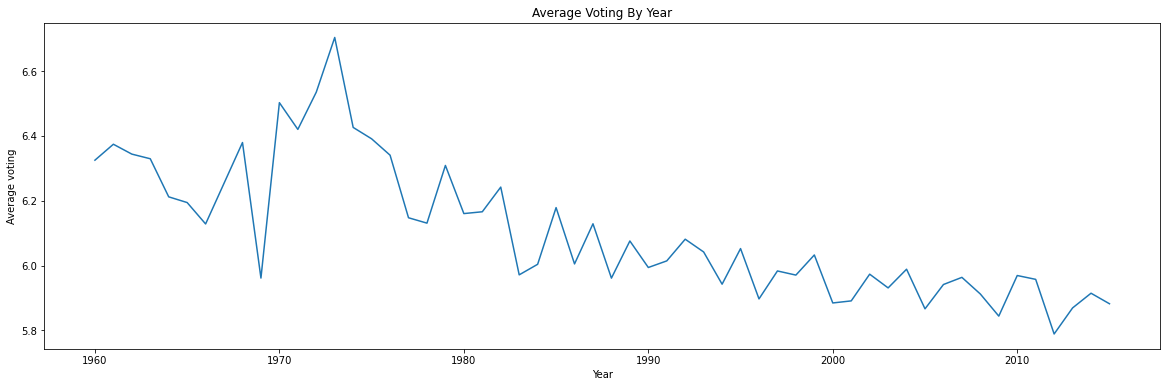

In [12]:
# get average voting for each year
avg_voting_by_year = movies.groupby('release_year')['vote_average'].mean()
# creat line plot
plt.subplots(figsize=(20,6))
plt.plot(avg_voting_by_year.index,avg_voting_by_year)
plt.title('Average Voting By Year')
plt.xlabel('Year')
plt.ylabel('Average voting')
plt.show()

- Conclusions:

    Average Voting are decreasing year over year 

------

### Research Question 3 (Most Common Genres)

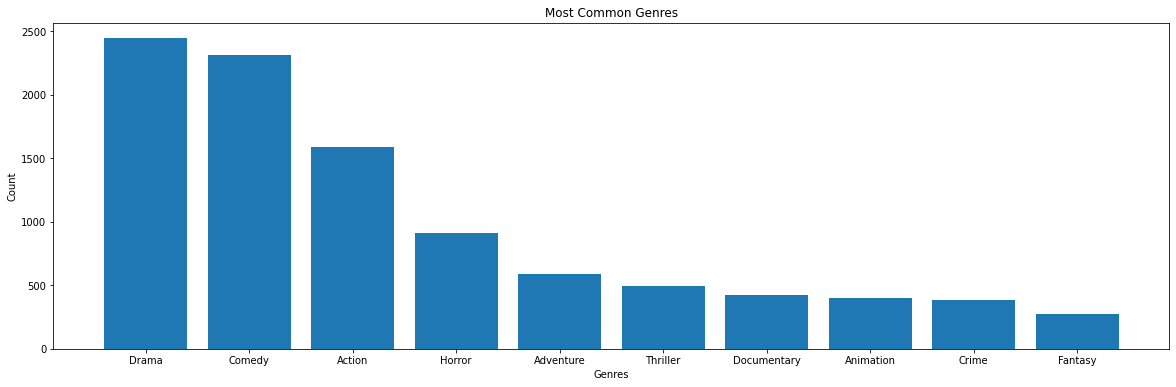

In [13]:
most_common_genres=movies['genres'].value_counts()[:10].sort_values(ascending=False)
# creat bar plot
plt.subplots(figsize=(20,6))
plt.bar(most_common_genres.index,most_common_genres)
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

- Conclusions:

    Drama Is The Most Common Gener In Dataset

### Research Question 4 (Revenue By Genres)

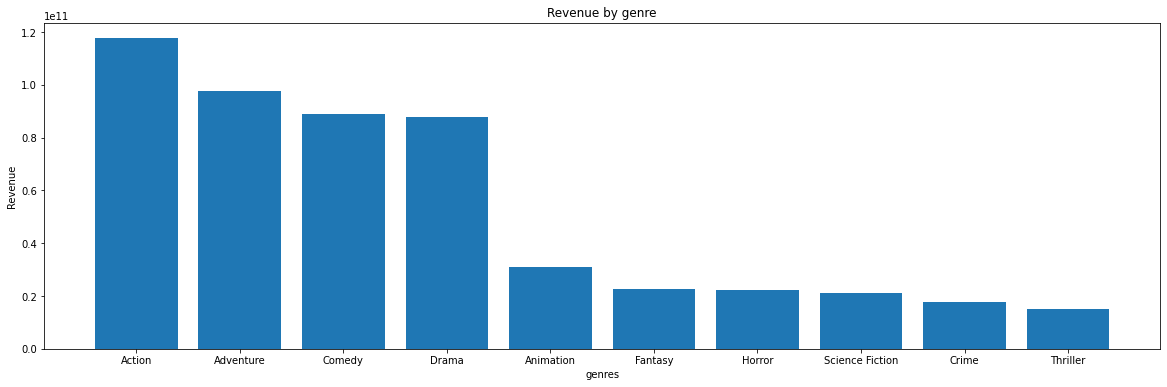

In [14]:
#get top 10 grossing genres using def function we created
genres_revenue = top_of_group(movies,'genres','revenue_adj') 
# creat bar plot
plt.subplots(figsize=(20,6))
plt.bar(genres_revenue.index,genres_revenue)
plt.title('Revenue by genre')
plt.xlabel('genres')
plt.ylabel('Revenue')
plt.show()

- Conclusions:

    Action Is The Highest Gener Revenue In Dataset

### Research Question 5 (Most Popular Genres)

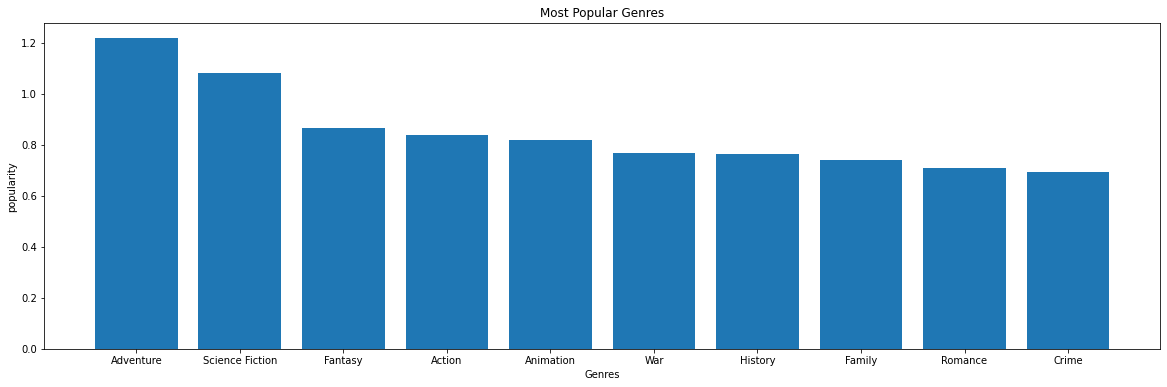

In [15]:
#get top 10 aavg_popular genres
popular_genres=movies.groupby(['genres'])['popularity'].mean().sort_values(ascending=False)[:10]
# creat bar plot
plt.subplots(figsize=(20,6))
plt.bar(popular_genres.index,popular_genres)
plt.title("Most Popular Genres")
plt.xlabel("Genres")
plt.ylabel("popularity")
plt.show()

- Conclusions:

    Adventure Is The Most Popular Gener In Dataset

------

### Research Question 6 (Most Grossing Movies)

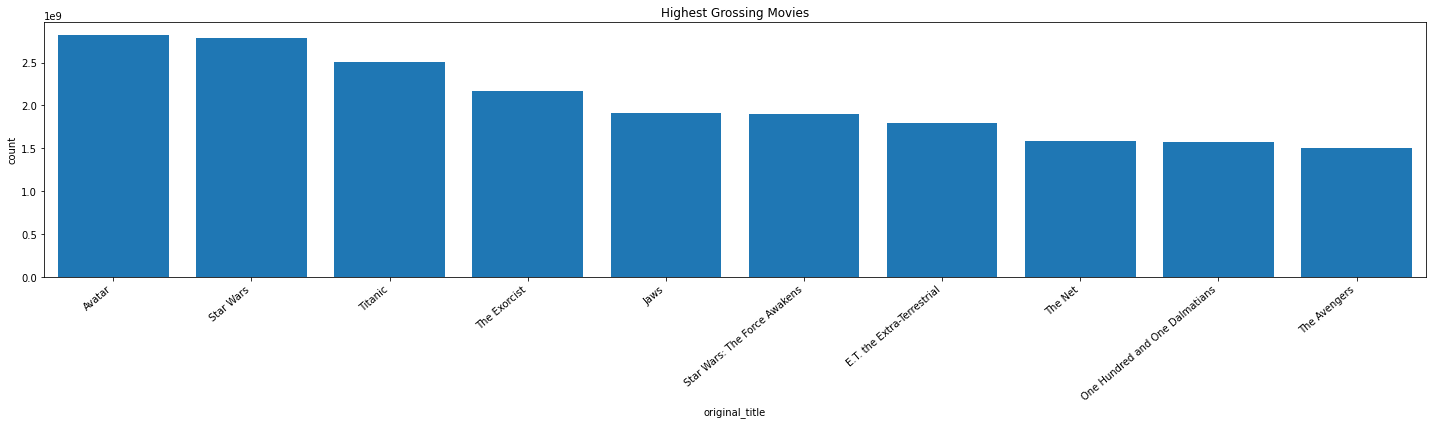

In [16]:
#get top 10 grossing movies using def function we created
highest_grossing_Movies = top_of_group(movies,'original_title','revenue_adj')
# creat bar plot
plt.subplots(figsize=(20,6))
plt.bar(highest_grossing_Movies.index,highest_grossing_Movies)
plt.title("Highest Grossing Movies")
plt.xlabel("Movie Name")
plt.ylabel("Revenue")
ax = sns.countplot(x=highest_grossing_Movies.index, data=movies)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- Conclusions:

    Avatar Is The Highest Grossing Movie In Dataset

### Research Question 7 (Highest Runed Movies)

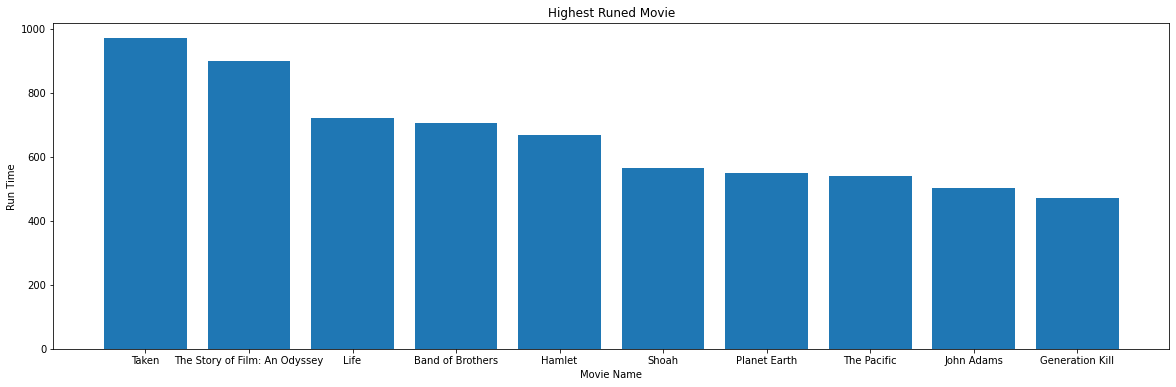

In [17]:
#get top 10 runed movies using def function we created
highest_runed_Movies = top_of_group(movies,'original_title','runtime')
# creat bar plot
plt.subplots(figsize=(20,6))
plt.bar(highest_runed_Movies.index,highest_runed_Movies)
plt.title("Highest Runed Movie")
plt.xlabel("Movie Name")
plt.ylabel("Run Time")
plt.show()

- Conclusions:

    Taken Is The Highest Runed Movie In Dataset

### Research Question 8 (Top popular Genres)

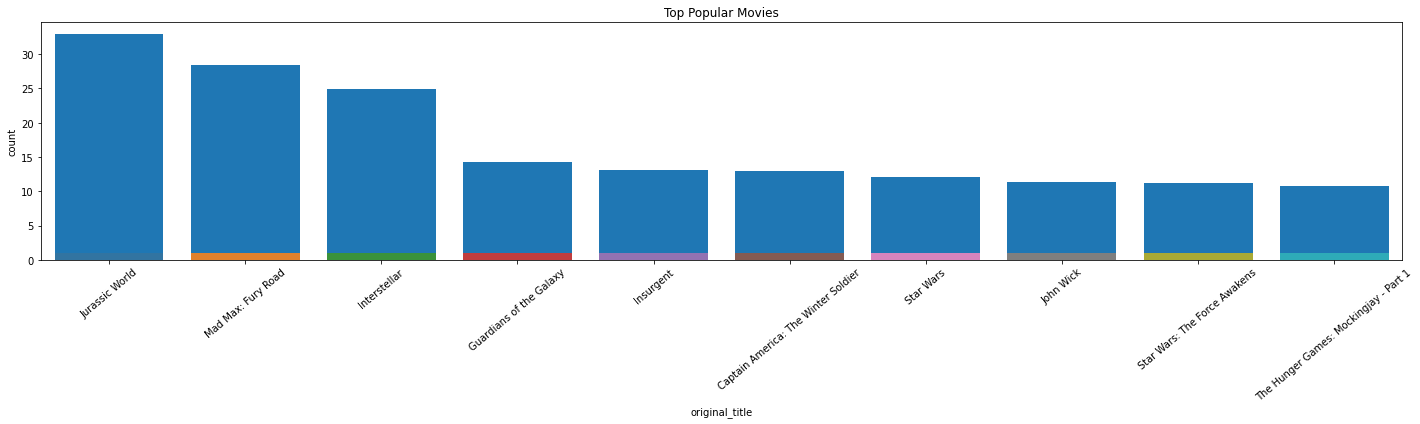

In [18]:
#get top 10 popular movie using def function we created
top_popular_movies = top_of_group(movies,'original_title','popularity')
# creat bar plot
plt.subplots(figsize=(20,6))
plt.bar(top_popular_movies.index,top_popular_movies)
plt.title("Top Popular Movies")
plt.xlabel("Movie Name")
plt.ylabel("popularity")
ax = sns.countplot(x=top_popular_movies.index, data=movies)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.tight_layout()
plt.show()

- Conclusions:

    Jurassic World Is The Top Popular Movie In Dataset

--------

### Research Question 9 (are the voted movies is most popular ?)

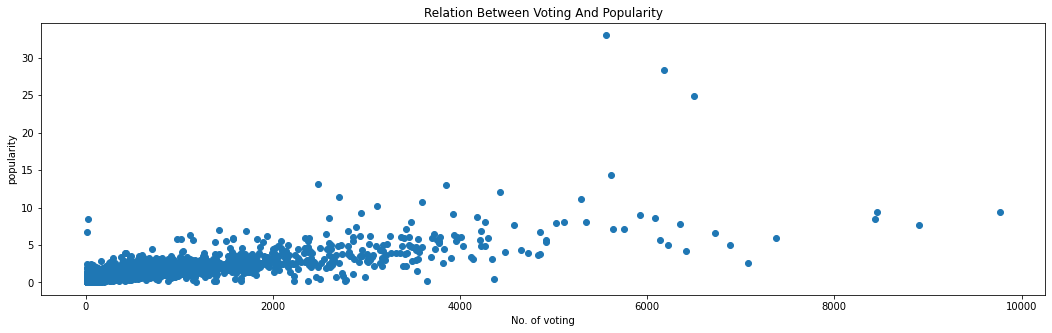

In [19]:
shorter_movies = movies.sort_values(by=['vote_count'], ascending = False)
# .head(100)
runtime = shorter_movies['vote_count']
popularity = shorter_movies['popularity']
plt.subplots(figsize=(18,5))
plt.scatter(runtime,popularity)
plt.title('Relation Between Voting And Popularity')
plt.ylabel('popularity')
plt.xlabel('No. of voting')
plt.show()

- Conclusions:
   
   The relationship between the count of voting and the popularity shows that the higher voted movies is the more popular.

### Research Question 10 ( Distrbution of vote average)

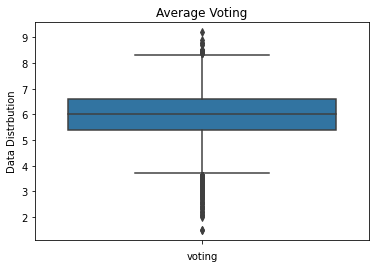

In [20]:
sns.boxplot(y='vote_average',data= movies)
plt.title('Average Voting')
plt.xlabel('voting')
plt.ylabel('Data Distrbution')
plt.show()

# Conclusion :
 -  Profits are increasing year over year
 -  Drama is the most popular genre, following by comedy , action and thriller.  
 -  Action Is The Highest Gener Revenue , following by Adventure , Comedy and Drama.
 -  Adventure Is The Most Popular Gener , following by science fiction , Fantasy and Action.
 -  Avatar Is The Highest Grossing Movie , following by Star wars , Titanic and the exorcist.
 -  Taken Is The Highest Runed Movie , following by The Story of Film: An Odyssey , Life , Band of Brothers.
 -  Jurassic World is the most popular movie , following by Mad Max: Fury Road , Interstellar , Guardians of the Galaxy.
 -  the relation between Number of voting and popularity shows that the higher voted movies is the most popular movies.

## Limitation
•	During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigat Data [TMDB-movies].ipynb'])

4294967295